In [18]:
from dotenv import load_dotenv
import os
from datetime import datetime, timezone, timedelta
import pandas as pd

from analysis.analysis_functions import get_data, kwh_meters_rename_dict, electric_variables, electrical_groups_dict_inv, electrical_consumption_groups_dict_inv, electrical_consumption_groups

%load_ext autoreload 
%autoreload 2

load_dotenv()

API_TOKEN = os.getenv("ANALYSIS_API_TOKEN")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
start = datetime.now(timezone.utc) - timedelta(days=6)
stop = datetime.now(timezone.utc) - timedelta(days=3)
window_size = timedelta(hours=1)

In [20]:
electric_data = await get_data([{"_field": variable} for variable in electric_variables], (start, stop), window_size, fl.WindowOperation.MEAN, API_TOKEN)
electric_data.index = electric_data.index.tz_convert('Europe/Madrid')


electric_data = electric_data.rename(columns = kwh_meters_rename_dict)


In [21]:
consumption_data = electric_data.T.groupby({**electrical_consumption_groups_dict_inv, **electrical_groups_dict_inv}).sum().T

aggregate_data = pd.DataFrame({'total_consumers':consumption_data[electrical_consumption_groups.keys()].sum(1), 'victron':consumption_data.AC_power})

<Axes: xlabel='_time'>

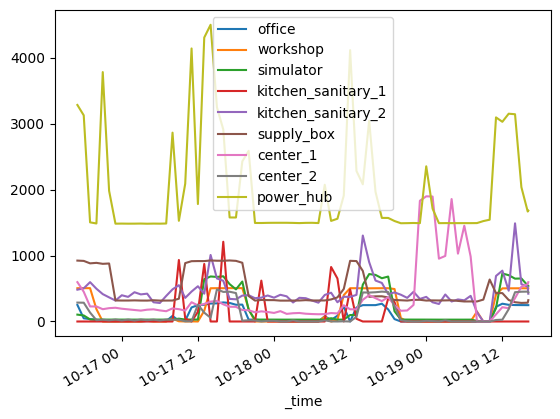

In [22]:
consumption_data[electrical_consumption_groups.keys()].plot()


<Axes: xlabel='_time'>

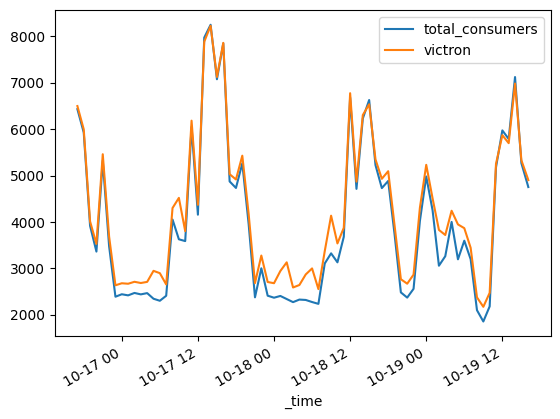

In [23]:
aggregate_data[[
    "total_consumers",
    "victron"]].plot()